Using darts library to train the model with dataset pv_1, The reason behind choosing this specific library is that it provide few global models to train for timeseries dataset. 

In [1]:
#pip install --upgrade numpy


In [2]:
#pip install darts 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# Read the CSV file
file_path = 'pv_1.csv'
df = pd.read_csv(file_path)
 
df['timestampUtc'] = pd.to_datetime(df['timestampUtc']).dt.tz_localize(None)

df

,timestampUtc,value,t_2mc,aswdifd_s,aswdir_s,vmax_10m,tot_prec
0,2021-10-01 00:00:00,0.617209,6.125610,0.0,0.0,2.080383,0.0
1,2021-10-01 00:15:00,0.617209,6.125610,0.0,0.0,2.080383,0.0
2,2021-10-01 00:30:00,0.617209,6.125610,0.0,0.0,2.080383,0.0
3,2021-10-01 00:45:00,0.617209,6.125610,0.0,0.0,2.080383,0.0
4,2021-10-01 01:00:00,0.617209,5.692749,0.0,0.0,2.003484,0.0
...,...,...,...,...,...,...,...
70076,2023-09-30 23:00:00,0.617209,9.964386,0.0,0.0,2.942344,0.0
70077,2023-09-30 23:15:00,0.617209,9.964386,0.0,0.0,2.942344,0.0
70078,2023-09-30 23:30:00,0.617209,9.964386,0.0,0.0,2.942344,0.0
70079,2023-09-30 23:45:00,0.617209,9.964386,0.0,0.0,2.942344,0.0


In [4]:
df['value'].fillna(method='ffill', inplace=True)


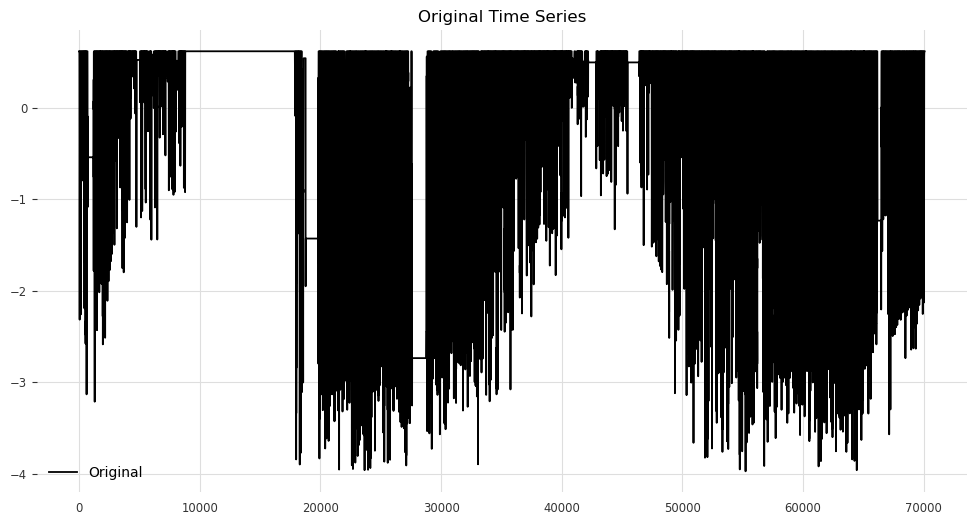

In [5]:
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')
plt.title('Original Time Series')
plt.legend()
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


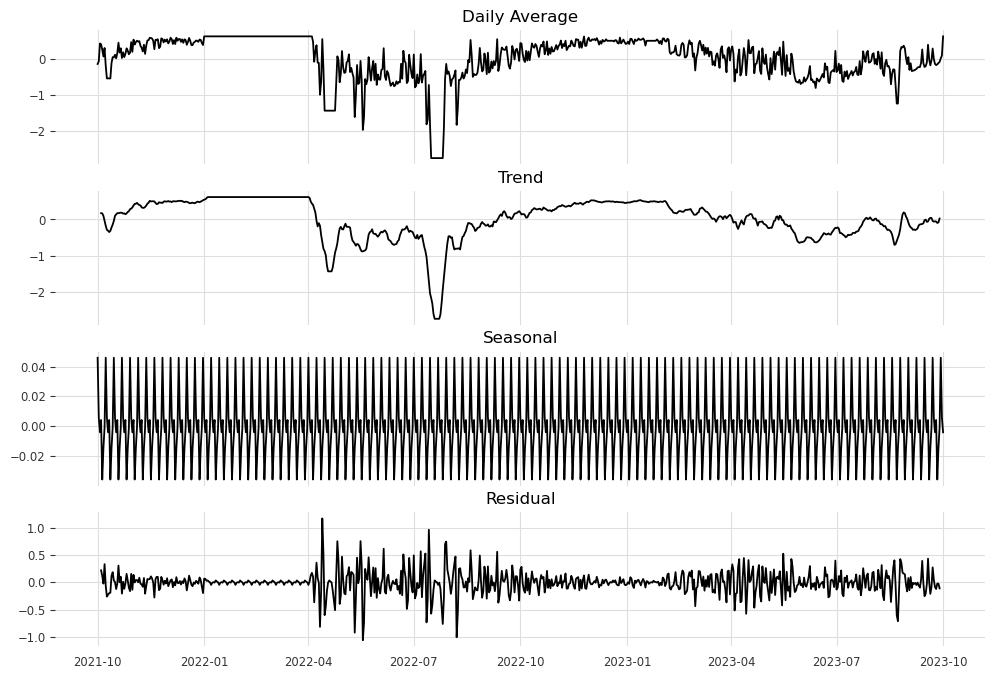

In [6]:
df1 = df.set_index('timestampUtc')
df_daily = df1.resample('D').mean()
result = seasonal_decompose(df_daily['value'], model='additive', period=7)  

# Plot the decomposed components with gaps between plots
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True, gridspec_kw={'hspace': 0.2})

# Plot the first subplot (Daily Average)
axs[0].plot(df_daily['value'])
axs[0].set_title('Daily Average')
axs[0].legend()

# Plot the second subplot (Trend)
axs[1].plot(result.trend)
axs[1].set_title('Trend')
axs[1].legend()

# Plot the third subplot (Seasonal)
axs[2].plot(result.seasonal)
axs[2].set_title('Seasonal')
axs[2].legend()

# Plot the fourth subplot (Residual)
axs[3].plot(result.resid)
axs[3].set_title('Residual')
axs[3].legend()

plt.show()

In [7]:

df_daily = df1.resample('D').mean()
R_daily = seasonal_decompose(df_daily['value'], model='additive', period=7)  

df_weekly = df1.resample('W').mean()
R_weekly = seasonal_decompose(df_weekly['value'], model='additive', period=7)  

df_Monthly = df1.resample('M').mean()
R_monthly = seasonal_decompose(df_weekly['value'], model='additive', period=30)  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


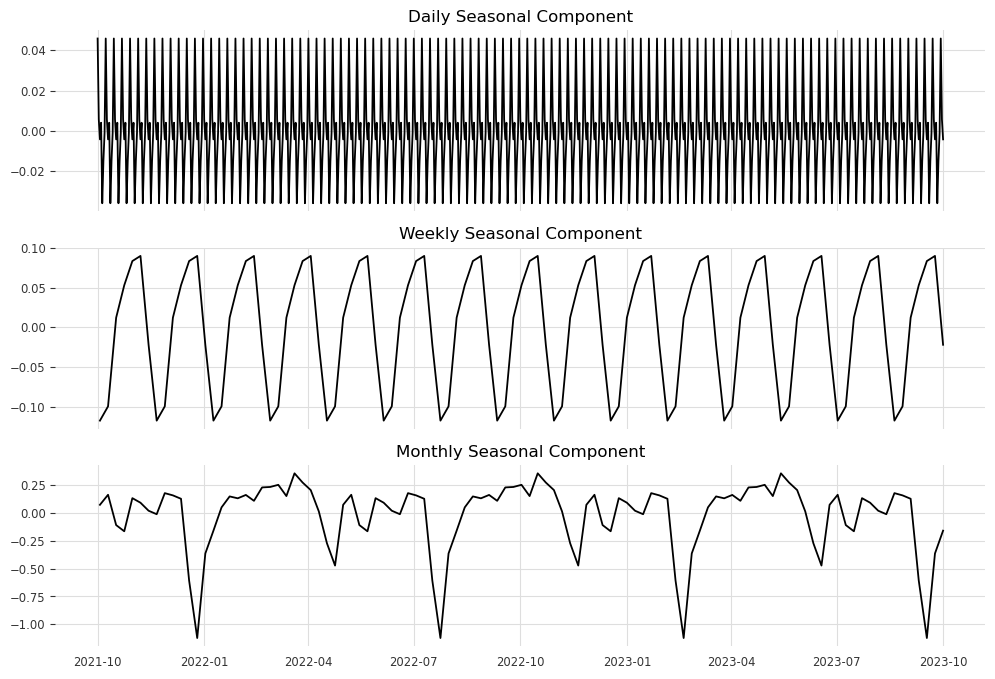

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'hspace': 0.2})

# Plot the first subplot (Daily Seasonal Component)
axs[0].plot(R_daily.seasonal)
axs[0].set_title('Daily Seasonal Component')
axs[0].legend()

# Plot the second subplot (Weekly Seasonal Component)
axs[1].plot(R_weekly.seasonal)
axs[1].set_title('Weekly Seasonal Component')
axs[1].legend()

# Plot the third subplot (Monthly Seasonal Component)
axs[2].plot(R_monthly.seasonal)
axs[2].set_title('Monthly Seasonal Component')
axs[2].legend()

plt.show()


Daily, Weekly and Monthly seasons are observed in the Dataset Pv_1 

............

In [9]:
df.index = pd.to_datetime(df.index)


## Training the model 

In [10]:
df = df.set_index('timestampUtc')

df.index = pd.to_datetime(df.index)

# Generate a complete date range with the desired frequency
complete_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the DataFrame with the complete date range
df = df.reindex(complete_index)

# Now create the TimeSeries
series = TimeSeries.from_dataframe(df, value_cols='value', freq='D')


In [11]:

train, val = series[:-100], series[-100:]
 

In [12]:

model = ExponentialSmoothing()


In [13]:
model.fit(train)


ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [14]:
prediction = model.predict(len(val), num_samples=1000)
prediction

<TimeSeries (DataArray) (time: 100, component: 1, sample: 1000)>
array([[[ 1.32386628,  0.76461461,  1.00185592, ...,  0.63915674,
          0.12996764,  0.453693  ]],

       [[ 1.18246533,  1.04888693,  0.62497052, ...,  0.68698124,
         -0.09346042, -0.00559088]],

       [[ 0.39767774,  0.11970079,  0.69401001, ...,  0.53571115,
         -0.38873381,  0.19892935]],

       ...,

       [[-0.71751518, -1.74430291, -0.8711798 , ...,  1.11796114,
          2.02805454, -2.78814432]],

       [[ 0.08117046, -1.9316593 , -0.4328602 , ...,  0.73784971,
          1.63673725, -2.61115444]],

       [[-0.38109576, -2.22641601, -0.65384732, ...,  1.27529244,
          1.3065343 , -3.24526946]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-06-24 2023-06-25 ... 2023-10-01
  * component  (component) object 'value'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

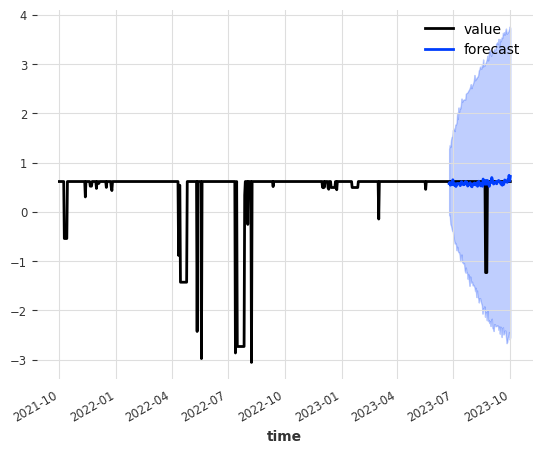

In [15]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()